In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import os
from sklearn import linear_model as lm

In [2]:
df=pd.read_csv("Train_big.csv")
df1=pd.read_csv("Test_big.csv")

In [3]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
df.Outlet_Size = df.Outlet_Size.fillna('Medium')
df1.Outlet_Size = df1.Outlet_Size.fillna('Medium')
#df1.Outlet_Size.value_counts()

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#df["Outlet_Size"] = le.fit_transform(df["Outlet_Size"].fillna(0))
df1["Outlet_Size"] = le.fit_transform(df1["Outlet_Size"].fillna(0))

var_mod = ['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Type','Outlet_Size']

for i in var_mod:
    df[i] = le.fit_transform(df[i])
for i in var_mod:
    df1[i] = le.fit_transform(df1[i])
df.dtypes 

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [6]:
df1.isnull().sum()

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

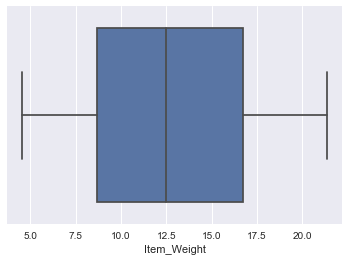

In [7]:
import seaborn as sns
sns.boxplot(df1['Item_Weight'])
sns.despine()

In [14]:
dfmean=np.mean(df.Item_Weight)
df.Item_Weight = df.Item_Weight.fillna(dfmean)
df1mean=np.mean(df1.Item_Weight)
df1.Item_Weight = df1.Item_Weight.fillna(df1mean)
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [18]:
df1.isnull().sum()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,1,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,2,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8.93,1,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052


In [19]:
X = df.ix[:,(1,2,3,4,5,7,8,9,10)].values
y = df.ix[:,(11)].values
print(X)
print(y)

[[  9.30000000e+00   1.00000000e+00   1.60473010e-02 ...,   1.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [  5.92000000e+00   2.00000000e+00   1.92782160e-02 ...,   1.00000000e+00
    2.00000000e+00   2.00000000e+00]
 [  1.75000000e+01   1.00000000e+00   1.67600750e-02 ...,   1.00000000e+00
    0.00000000e+00   1.00000000e+00]
 ..., 
 [  1.06000000e+01   1.00000000e+00   3.51862710e-02 ...,   2.00000000e+00
    1.00000000e+00   1.00000000e+00]
 [  7.21000000e+00   2.00000000e+00   1.45220646e-01 ...,   1.00000000e+00
    2.00000000e+00   2.00000000e+00]
 [  1.48000000e+01   1.00000000e+00   4.48782800e-02 ...,   2.00000000e+00
    0.00000000e+00   1.00000000e+00]]
[ 3735.138    443.4228  2097.27   ...,  1193.1136  1845.5976   765.67  ]


In [20]:
Xtest = df1.ix[:,(1,2,3,4,5,7,8,9,10)].values

In [21]:
from sklearn import svm
#model=svm.SVR()
model=lm.LinearRegression()
model.fit(X,y)
model.score(X,y)

0.50788349600485061

In [22]:
prediction=model.predict(Xtest)

In [41]:
#pd.DataFrame({'Item_Identifier':df1.Item_Identifier,'Outlet_Identifier':df1.Outlet_Identifier,'Item_Outlet_Sales':prediction}).set_index('Item_Identifier','Outlet_Identifier').to_csv('submit3.csv')


In [28]:
submission = pd.DataFrame({
        "Item_Identifier": df1["Item_Identifier"],
        "Outlet_Identifier": df1["Outlet_Identifier"],
        "Item_Outlet_Sales": prediction
    })
submission.to_csv('submission.csv', index=False)